# Lab 9 Tasks - Solution

In this notebook we will use regression techniques to analyse a subset of the [2019 World Happiness Index Report](https://worldhappiness.report/) dataset. In this dataset each row represents a country, with the following features:

- *country*: name of the country for each row
- *gdp*: real GDP per capita
- *social_support*: amount of social support that is present in a country
- *health*: healthy life expectancy,
- *freedom*: freedom to make life choices 
- *generosity*: leve of generosity of citizens
- *corruption*: perceptions of corruption in a country

## Task 1

Download the World Happiness Index data from the link below, and load the data into a Pandas DataFrame.

http://mlg.ucd.ie/modules/COMP41680/happiness2019.csv

In [2]:
import pandas as pd
# Pandas can download the data directly from the URL
df = pd.read_csv("http://mlg.ucd.ie/modules/COMP41680/happiness2019.csv", index_col="country")
df.head(10)

,gdp,social_support,health,freedom,generosity,corruption
country,,,,,,
Afghanistan,0.350,0.517,0.361,0.000,0.158,0.025
Albania,0.947,0.848,0.874,0.383,0.178,0.027
Algeria,1.002,1.160,0.785,0.086,0.073,0.114
Argentina,1.092,1.432,0.881,0.471,0.066,0.050
Armenia,0.850,1.055,0.815,0.283,0.095,0.064
Australia,1.372,1.548,1.036,0.557,0.332,0.290
Austria,1.376,1.475,1.016,0.532,0.244,0.226
Azerbaijan,1.043,1.147,0.769,0.351,0.035,0.182
Bahrain,1.362,1.368,0.871,0.536,0.255,0.110


## Task 2 

Calculate basic summary statistics for the data. List the top 5 ranked countries for each measure.

In [3]:
df.describe()

,gdp,social_support,health,freedom,generosity,corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [4]:
from IPython.display import display
for column in df.columns:
    print("Top countries by %s" % column )
    display(df.nlargest(5, column)[[column]])

Top countries by gdp


,gdp
country,
Qatar,1.684
Luxembourg,1.609
Singapore,1.572
United Arab Emirates,1.503
Kuwait,1.500


Top countries by social_support


,social_support
country,
Iceland,1.624
Finland,1.587
Norway,1.582
Denmark,1.573
New Zealand,1.557


Top countries by health


,health
country,
Singapore,1.141
Hong Kong,1.122
Japan,1.088
Spain,1.062
Switzerland,1.052


Top countries by freedom


,freedom
country,
Uzbekistan,0.631
Cambodia,0.609
Norway,0.603
United Arab Emirates,0.598
Finland,0.596


Top countries by generosity


,generosity
country,
Myanmar,0.566
Indonesia,0.498
Haiti,0.419
Malta,0.375
Kenya,0.372


Top countries by corruption


,corruption
country,
Singapore,0.453
Rwanda,0.411
Denmark,0.410
Finland,0.393
New Zealand,0.380


Generate a boxplot of the measures in the dataset. 

Do you see any **outliers** for any of the measures?

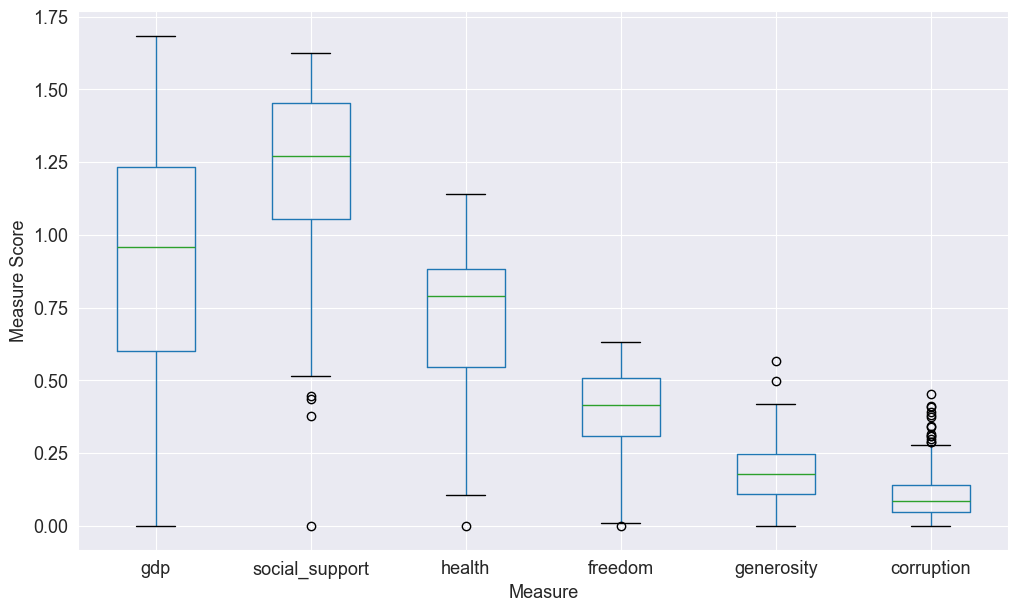

In [5]:
import matplotlib.pyplot as plt
# %matplotlib inline
# generate the box plot
df.boxplot(figsize=(12,7), fontsize=13)
plt.xlabel("Measure", fontsize=13)
plt.ylabel("Measure Score", fontsize=13)
plt.show()

In the above we can spot potential outliers that appear above or below the T-bars of each boxplot (i.e. the circles above/below the maximum/minimum limits of the boxplot). For instance, we see some lower outliers for the measures *social_support*, *health* and *freedom*, while we see some upper outliers for *generosity* and *corruption*.

## Task 3

Calculate the correlations between the different variables in the data. 

Which pair of variables are: (i) the most highly correlated; (ii) the least correlated?

In [6]:
# calculate the pairwise correlations
df_c = df.corr()
df_c

,gdp,social_support,health,freedom,generosity,corruption
gdp,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
social_support,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
health,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
freedom,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
generosity,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
corruption,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


In [7]:
# we could turn this into a sorted DataFrame to show us a ranking for the pairs of variables
# with the highest and lowest correlation
from itertools import combinations
rows = []
for v1, v2 in combinations(df_c.columns, 2):
    rows.append({"Variable 1": v1, "Variable 2": v2, "Correlation": df_c[v1][v2]})
# show the ranked list
pd.DataFrame(rows).sort_values(by="Correlation", ascending=False)

,Variable 1,Variable 2,Correlation
1,gdp,health,0.835462
0,gdp,social_support,0.754906
5,social_support,health,0.719009
6,social_support,freedom,0.447333
13,freedom,corruption,0.438843
9,health,freedom,0.390395
2,gdp,freedom,0.379079
14,generosity,corruption,0.326538
4,gdp,corruption,0.298920
11,health,corruption,0.295283


## Task 4

Apply a **simple linear regression** to learn (fit) the model, where *gdp* is the independent variable and *health* is the target variable that we would like to predict. Produce a plot of the regression line.

Coefficient (slope): 0.5078
Intercept: 0.2656


/var/folders/4j/3w98pmcj1qb9m2ysc0djsvnc0000gn/T/ipykernel_22830/2431294083.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Coefficient (slope): %.4f" % model.coef_[0])
/var/folders/4j/3w98pmcj1qb9m2ysc0djsvnc0000gn/T/ipykernel_22830/2431294083.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Intercept: %.4f" % model.intercept_)


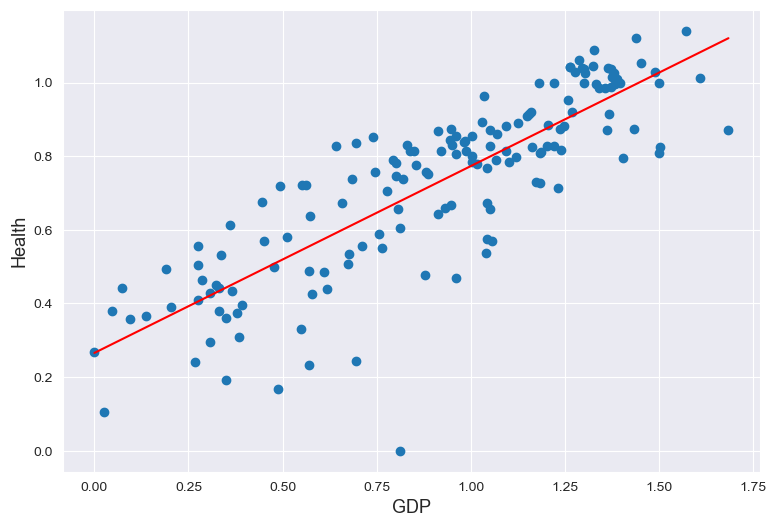

In [8]:
# Get the columns
x = df[["gdp"]].values
y = df[["health"]].values
# Now build the regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
print("Coefficient (slope): %.4f" % model.coef_[0])
print("Intercept: %.4f" % model.intercept_)
# plot the data
plt.figure(figsize=(9,6))
plt.scatter(x, y)
# plot the regression line
m = model.coef_[0]
b = model.intercept_
plt.plot([min(x), max(x)], [b, m*max(x) + b], 'r')
plt.xlabel('GDP', fontsize=13)
plt.ylabel('Health', fontsize=13)
plt.show()

## Task 5

Repeat the process from Task 4, but this time use *generosity* as the **target** variable. What does a comparison of the two regression lines indicate?

[[0.35 ]
 [0.947]
 [1.002]
 [1.092]
 [0.85 ]
 [1.372]
 [1.376]
 [1.043]
 [1.362]
 [0.562]
 [1.067]
 [1.356]
 [0.393]
 [0.813]
 [0.776]
 [0.945]
 [1.041]
 [1.004]
 [1.092]
 [0.331]
 [0.046]
 [0.574]
 [0.549]
 [1.365]
 [0.026]
 [0.35 ]
 [1.159]
 [1.029]
 [0.985]
 [0.274]
 [0.673]
 [0.094]
 [1.034]
 [1.155]
 [1.263]
 [1.269]
 [1.383]
 [1.015]
 [0.912]
 [0.913]
 [0.794]
 [1.237]
 [0.336]
 [1.34 ]
 [1.324]
 [1.057]
 [0.308]
 [0.886]
 [1.373]
 [0.611]
 [1.181]
 [0.8  ]
 [0.38 ]
 [0.323]
 [0.642]
 [1.438]
 [1.201]
 [1.38 ]
 [0.755]
 [0.931]
 [1.1  ]
 [1.043]
 [1.499]
 [1.276]
 [1.294]
 [0.569]
 [0.831]
 [1.327]
 [0.837]
 [1.173]
 [0.512]
 [0.882]
 [1.5  ]
 [0.551]
 [0.764]
 [1.187]
 [0.987]
 [0.489]
 [0.073]
 [1.044]
 [1.238]
 [1.609]
 [0.274]
 [0.191]
 [1.221]
 [0.385]
 [1.3  ]
 [0.57 ]
 [1.12 ]
 [1.07 ]
 [0.685]
 [0.948]
 [1.051]
 [0.801]
 [0.204]
 [0.71 ]
 [0.879]
 [0.446]
 [1.396]
 [1.303]
 [0.694]
 [0.138]
 [0.696]
 [0.983]
 [1.263]
 [1.488]
 [0.677]
 [0.657]
 [1.149]
 [0.855]
 [0.96 ]
 

/var/folders/4j/3w98pmcj1qb9m2ysc0djsvnc0000gn/T/ipykernel_22830/3834878176.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Coefficient (slope): %.4f" % model.coef_[0])
/var/folders/4j/3w98pmcj1qb9m2ysc0djsvnc0000gn/T/ipykernel_22830/3834878176.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Intercept: %.4f" % model.intercept_)


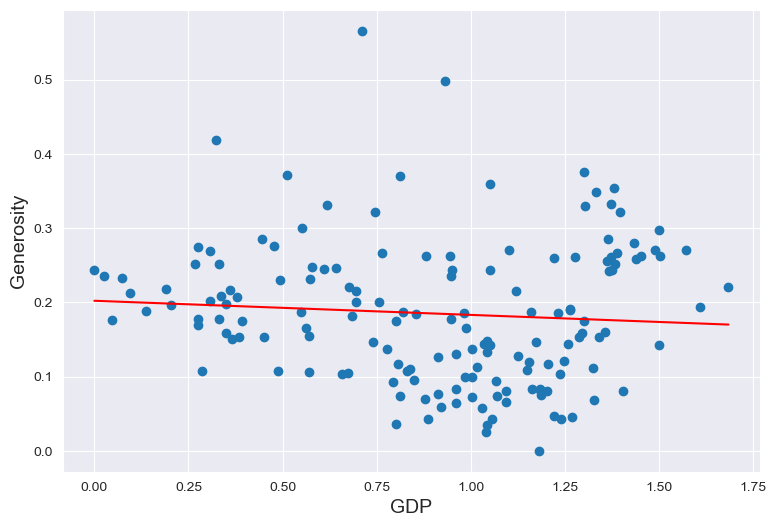

In [9]:
# Get the columns
x = df[["gdp"]].values
y = df[["generosity"]].values
print(x)
print(y)
# Now build the regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
print("Coefficient (slope): %.4f" % model.coef_[0])
print("Intercept: %.4f" % model.intercept_)
# plot the data
plt.figure(figsize=(9,6))
plt.scatter(x, y)
# plot the regression line
m = model.coef_[0]
b = model.intercept_
plt.plot([min(x), max(x)], [b, m*max(x) + b], 'r')
plt.xlabel('GDP', fontsize=14)
plt.ylabel('Generosity', fontsize=14)
plt.show()

There appears to be a strong correlation between GDP per capita and healthy life expectancy, for far less correlation between GDP per capita and generosity (i.e. level of charitable donations).